In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

datas = pd.read_csv("./data/PlayTennis.csv")
print(datas)

     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [2]:
label_encoder = LabelEncoder()
target_names = label_encoder.fit(datas['play']).classes_
print(target_names)

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])

print(datas)

x_data, y_data = datas.drop(['play'], axis=1), datas['play'] #drop은 그 부분을 지우고 만들라는 뜻임.

import os
os.environ["PATH"]+=os.pathsep+'C:\ProgramData\Anaconda3\Library\bin\graphviz'


['no' 'yes']
    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0


In [3]:
#import os
#os.environ["PATH"]+=os.pathsep+'C:/ProgramData/Anaconda3/Library/bin/graphviz'

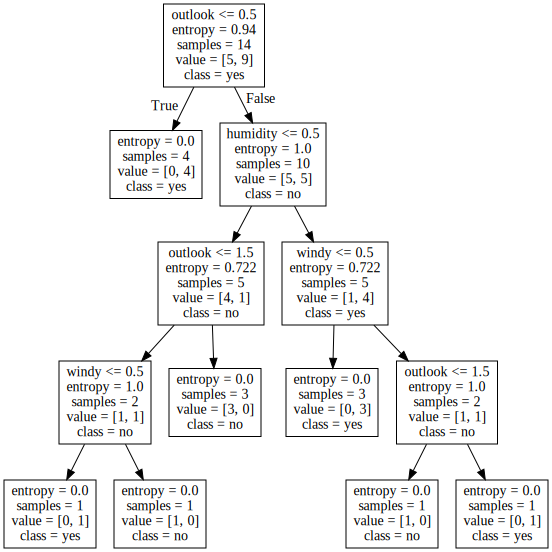

In [6]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
train_result = decision_tree.fit(x_data, y_data)

graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None, feature_names=x_data.columns, class_names=target_names))
graph

In [5]:
predict_result = decision_tree.predict(x_data)
predict_result == y_data

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool